# Tensors

In [ ]:
import torch
import numpy as np

In [ ]:
x = torch.tensor([1,2,3])
x

tensor([1, 2, 3])

In [ ]:
x = torch.arange(0,10)
xs = torch.arange(0,10).unsqueeze(dim=1)
x, xs

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([[0],
         [1],
         [2],
         [3],
         [4],
         [5],
         [6],
         [7],
         [8],
         [9]]))

In [ ]:
x = np.array([1,2,3,4])
print(x)
x = torch.from_numpy(x)
print(x)

[1 2 3 4]
tensor([1, 2, 3, 4])


In [ ]:
x = torch.tensor([[1,2],[3,4]])
x.shape

torch.Size([2, 2])

In [ ]:
x = torch.zeros(5)
y = torch.ones(5)
z = torch.tensor([1,2,3], dtype=torch.float32)
x, y, z.mean()

(tensor([0., 0., 0., 0., 0.]), tensor([1., 1., 1., 1., 1.]), tensor(2.))

# Data Creation and Splitting

In [ ]:
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

torch.manual_seed(42)

In [ ]:
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = 0.7*X + 0.3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
X_train.shape, y_train.shape

(torch.Size([40, 1]), torch.Size([40, 1]))

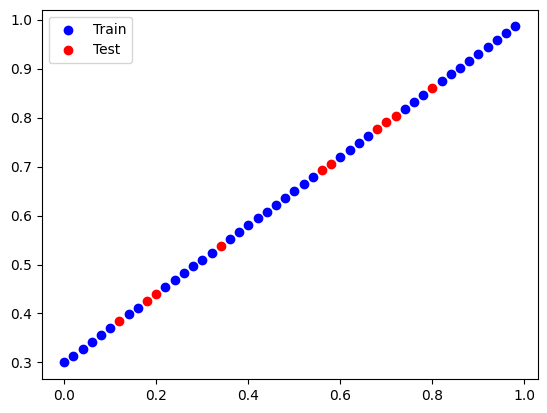

In [ ]:
plt.scatter(X_train, y_train, c="b", label="Train")
plt.scatter(X_test, y_test, c="r", label="Test")
plt.legend()
plt.show()

In [ ]:
class LinearReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self,x):
        return self.weight * x + self.bias


## Test with initial parameters

In [ ]:
torch.manual_seed(42)
model = LinearReg()
model.state_dict()
print(model.state_dict())

with torch.inference_mode():
    y_pred = model(X_test)
y_pred

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


tensor([[0.1894],
        [0.3712],
        [0.3645],
        [0.1961],
        [0.3982],
        [0.3578],
        [0.1692],
        [0.3174],
        [0.2433],
        [0.3241]])

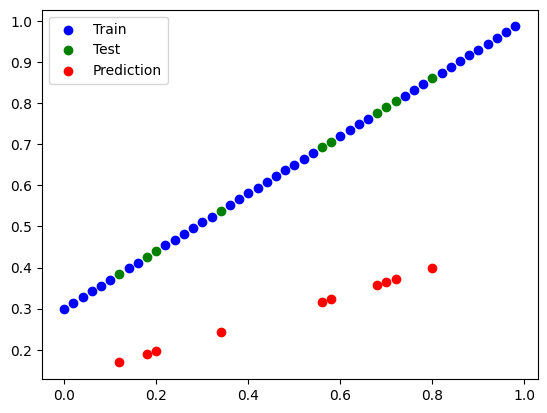

In [ ]:
def plotpred(X_train, y_train, X_test,y_test,y_pred):
    plt.scatter(X_train, y_train, c="b", label="Train")
    plt.scatter(X_test, y_test, c="g", label="Test")
    if y_pred is not None :
      plt.scatter(X_test, y_pred, c="r", label="Prediction")
    plt.legend()
    plt.show()

plotpred(X_train, y_train, X_test,y_test,y_pred)

# Training Loop

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

epochs = 30
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # Forward pass
    model.train()

    # Make predictions
    y_pred = model(X_train)

    # Calculate loss
    loss = loss_fn(y_pred, y_train)
    loss_values.append(loss)

    # Reset gradients as they accumulate
    optimizer.zero_grad()

    # Back propagation, gradient descent
    loss.backward()
    optimizer.step()

    # Evaluate model
    model.eval()
    with torch.inference_mode():
        test_preds = model(X_test)
        test_loss = loss_fn(test_preds, y_test)
        test_loss_values.append(test_loss)
        epoch_count.append(epoch)

    if epoch % 10 ==0 :
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

model.state_dict()


Epoch: 0 | Loss: 0.011479237116873264 | Test Loss: 0.00915915984660387
Epoch: 10 | Loss: 0.006177536211907864 | Test Loss: 0.004702270030975342
Epoch: 20 | Loss: 0.007614235393702984 | Test Loss: 0.00477328896522522


OrderedDict([('weight', tensor([0.6976])), ('bias', tensor([0.3088]))])

In [ ]:
model.state_dict()

OrderedDict([('weight', tensor([0.6557])), ('bias', tensor([0.3228]))])

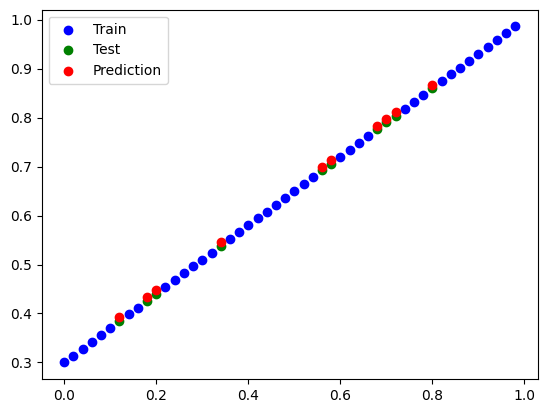

In [ ]:
plotpred(X_train, y_train, X_test,y_test,test_preds.detach().numpy())

## Using the Linear Layer Directly

In [ ]:
class LinearReg2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self,x):
        return self.linear_layer(x)

In [ ]:
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = 0.7*X + 0.3

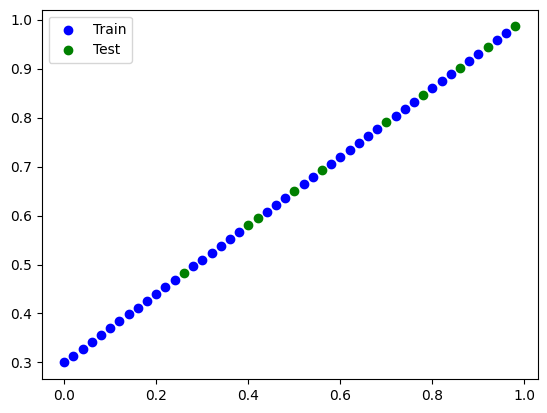

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
plotpred(X_train, y_train, X_test,y_test, y_pred=None)

In [ ]:
torch.manual_seed(42)

model = LinearReg2()
print(model.state_dict())

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

epochs = 100
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)
    loss_values.append(loss.detach().numpy())

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_preds = model(X_test)
        test_loss = loss_fn(test_preds, y_test)
        test_loss_values.append(test_loss)
        epoch_count.append(epoch)

    if epoch % 10 ==0 :
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

model.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])
Epoch: 0 | Loss: 0.5592438578605652 | Test Loss: 0.5582932829856873
Epoch: 10 | Loss: 0.43872302770614624 | Test Loss: 0.4293919503688812
Epoch: 20 | Loss: 0.31820210814476013 | Test Loss: 0.3004906177520752
Epoch: 30 | Loss: 0.19768126308918 | Test Loss: 0.1715892255306244
Epoch: 40 | Loss: 0.07716040313243866 | Test Loss: 0.04268781095743179
Epoch: 50 | Loss: 0.034132350236177444 | Test Loss: 0.026448428630828857
Epoch: 60 | Loss: 0.028402913361787796 | Test Loss: 0.02344614267349243
Epoch: 70 | Loss: 0.02312563918530941 | Test Loss: 0.01914812996983528
Epoch: 80 | Loss: 0.01784454844892025 | Test Loss: 0.014666393399238586
Epoch: 90 | Loss: 0.01256345771253109 | Test Loss: 0.010184663347899914


OrderedDict([('linear_layer.weight', tensor([[0.6718]])),
             ('linear_layer.bias', tensor([0.3145]))])

## Plotting Loss

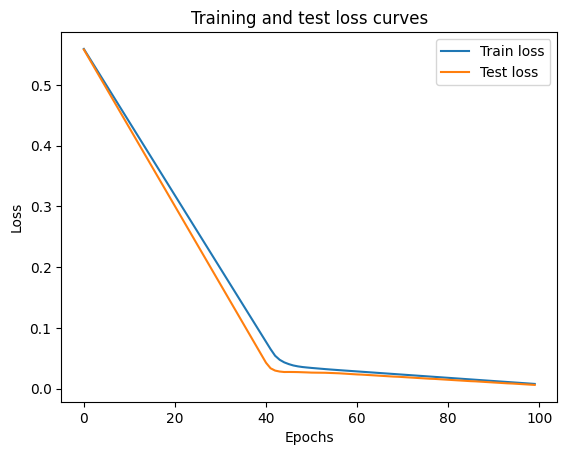

In [ ]:
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()